In [6]:
import re
from operator import add
file_in1 = sc.textFile('.//data//eula_ascii.1028.txt')
file_in1.count()

112

In [7]:
chars=file_in1.map(lambda s:len(s)).reduce(add)
chars

8681

In [9]:
file_in1.map(lambda s:len(s)).take(5)

[80, 76, 78, 79, 79]

In [12]:
words = file_in1.flatMap(lambda line:re.split('\\W+', line.lower().strip()))
words.take(20)

[u'',
 u'you',
 u'have',
 u'received',
 u'the',
 u'software',
 u'as',
 u'part',
 u'of',
 u'the',
 u'visual',
 u'studio',
 u'9',
 u'0',
 u'beta',
 u'program',
 u'',
 u'the',
 u'terms',
 u'and']

In [15]:
counts = file_in1.flatMap(lambda line:line.split(" "))\
.map(lambda word:(word, 1)).reduceByKey(lambda a,b: a+b)
counts.take(20)

[(u'', 112),
 (u'FEEDBACK.', 1),
 (u'all', 4),
 (u'permits,', 1),
 (u'LICENSE', 1),
 (u'from', 1),
 (u'EFFECT.', 1),
 (u'able', 1),
 (u'\ufffd\ufffdas', 1),
 (u'domestic', 1),
 (u'peut', 2),
 (u'LAWS,', 1),
 (u'including', 1),
 (u'publish', 1),
 (u'EXTENT', 1),
 (u'tort.', 1),
 (u'interpretation', 1),
 (u'Program.', 1),
 (u'present', 2),
 (u'faute', 1)]

In [17]:
countsReverse = counts.map(lambda x:(x[1],x[0])).sortByKey(False)
countsReverse.take(20)

[(112, u''),
 (54, u'the'),
 (30, u'to'),
 (27, u'software'),
 (25, u'of'),
 (20, u'\ufffdE'),
 (19, u'and'),
 (18, u'you'),
 (18, u'de'),
 (16, u'or'),
 (14, u'may'),
 (14, u'any'),
 (13, u'not'),
 (13, u'for'),
 (13, u'in'),
 (12, u'this'),
 (12, u'Microsoft'),
 (11, u'ou'),
 (11, u'with'),
 (11, u'your')]

([<matplotlib.axis.YTick at 0xfc61128>,
 <a list of 15 Text yticklabel objects>)

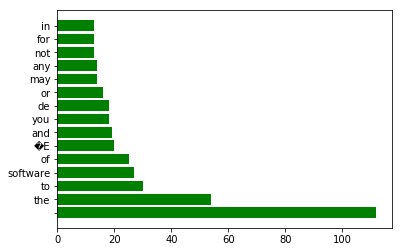

In [19]:
% matplotlib inline
import matplotlib.pyplot as plt
count = map(lambda x:x[0], countsReverse.take(15))
word = map(lambda x:x[1], countsReverse.take(15))
plt.barh(range(len(count)),count, color='green')
plt.yticks(range(len(count)), word)

In [1]:
sc